In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno


In [3]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [4]:
df= pd.read_excel('/content/drive/MyDrive/projetIA/Projet1/online_retail_II.xlsx', sheet_name='Year 2009-2010')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Additional Variable Information

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.

In [12]:
# Tjrs faire une copy de la donnée avant de commencer EDA
data= df.copy()

# EDA

### Objectif :
* Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
* Développer une premiere stratégie de modélisation
### Checklist de base
#### Analyse de Forme :
* variable target : Price
* lignes et colonnes : (525461,8)
* types de variables : object:50%, float64: 25%, datetime: 12.5%, int64: 12.5%
* Analyse des valeurs manquantes :Description: 0.5572%, CustomID: 20,5395%

#### Analyse de Fond :
* Visualisation de la target :
* Signification des variables :
* Relation Variables / Target :
#### Analyse plus détaillée
* Relation Variables / Variables :
* NaN analyse
* hypotheses

## Analyse de Forme

In [ ]:
data.shape

(525461, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
num_cols = data.select_dtypes(include='number').columns.tolist()
cat_cols = data.select_dtypes(include='object').columns.tolist()

In [ ]:
num_cols

['Quantity', 'Price', 'Customer ID']

In [ ]:
cat_cols

['Invoice', 'StockCode', 'Description', 'Country']

<Axes: >

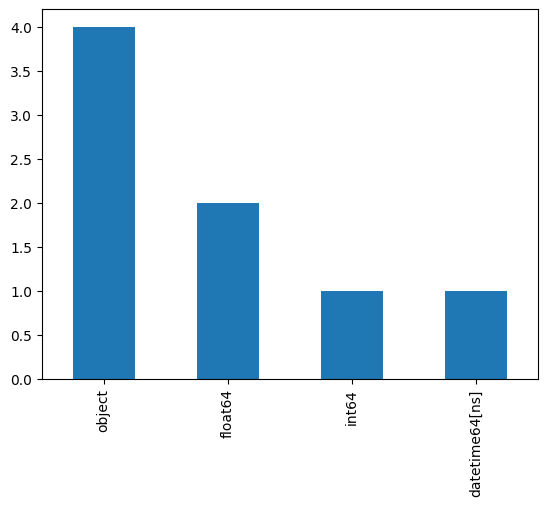

In [ ]:
data.dtypes.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

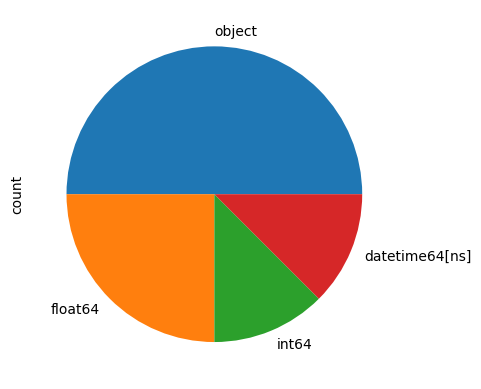

In [ ]:
data.dtypes.value_counts().plot(kind='pie')

In [ ]:
data.dtypes.value_counts(normalize=True)

,proportion
object,0.500
float64,0.250
int64,0.125
datetime64[ns],0.125


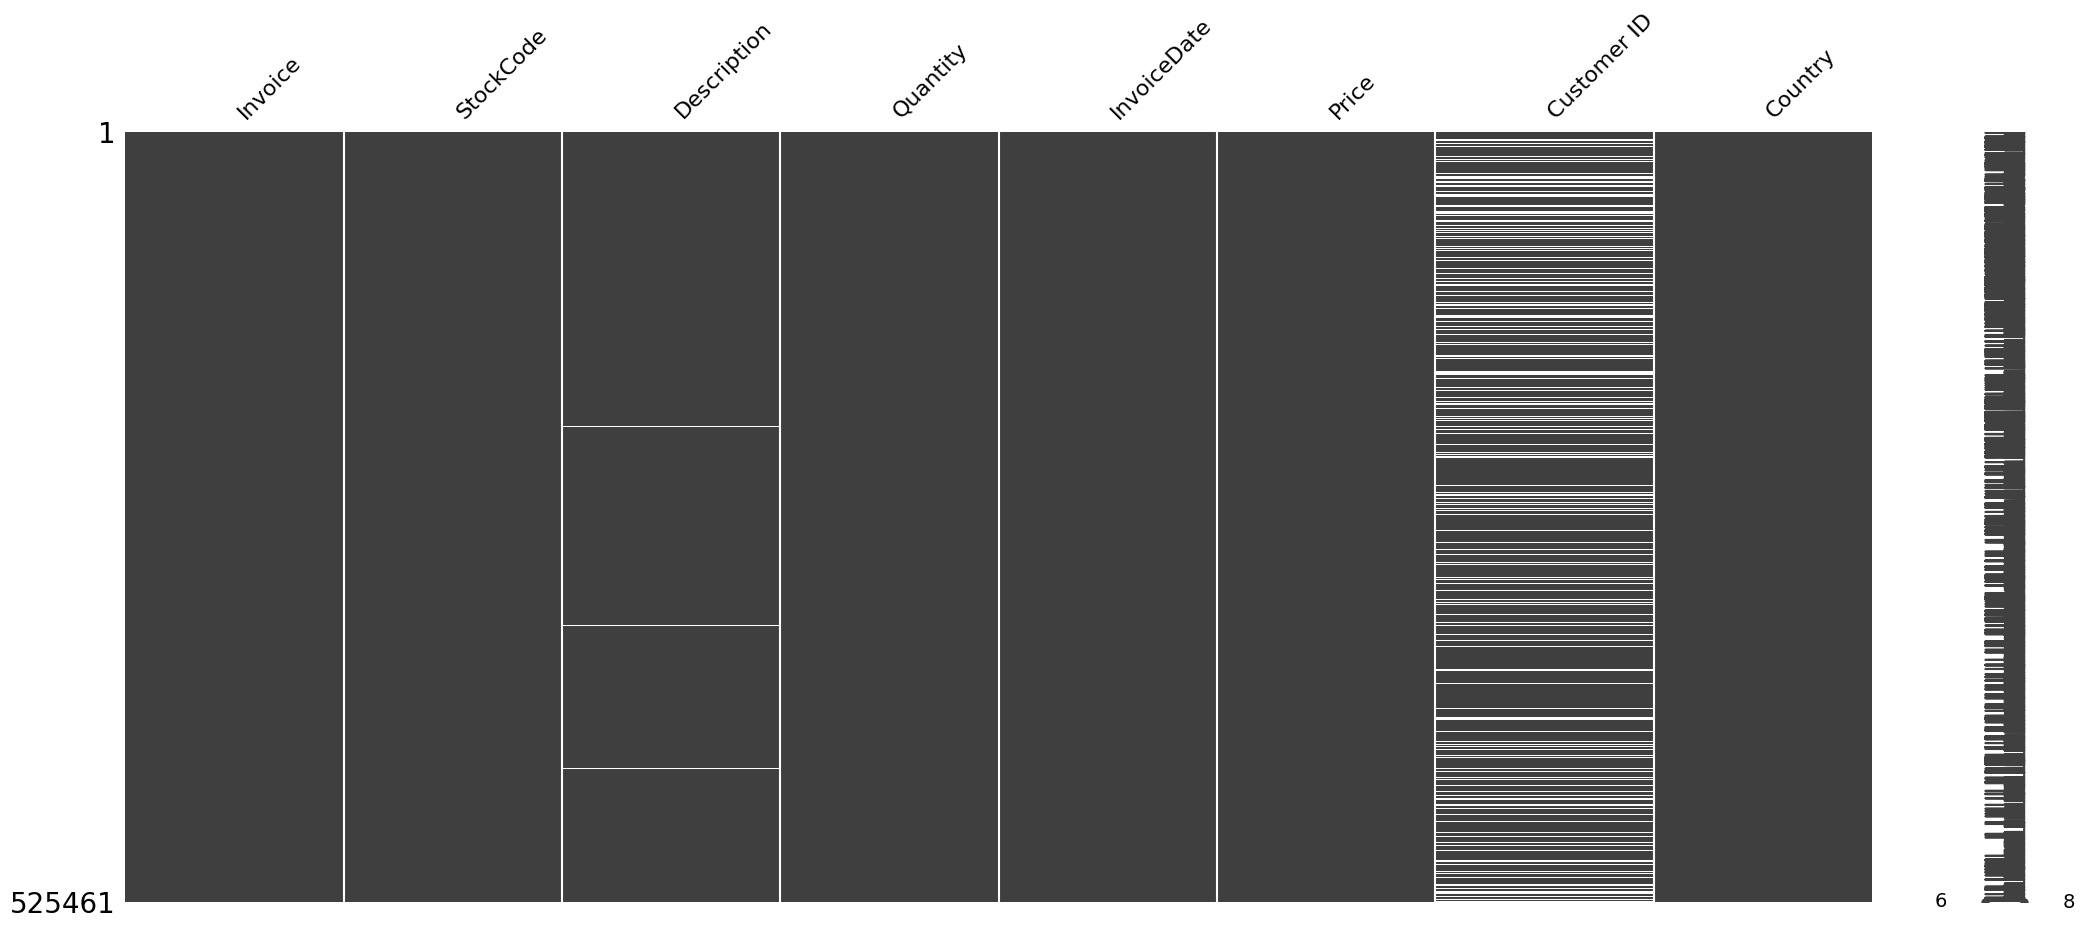

In [ ]:
msno.matrix(data);

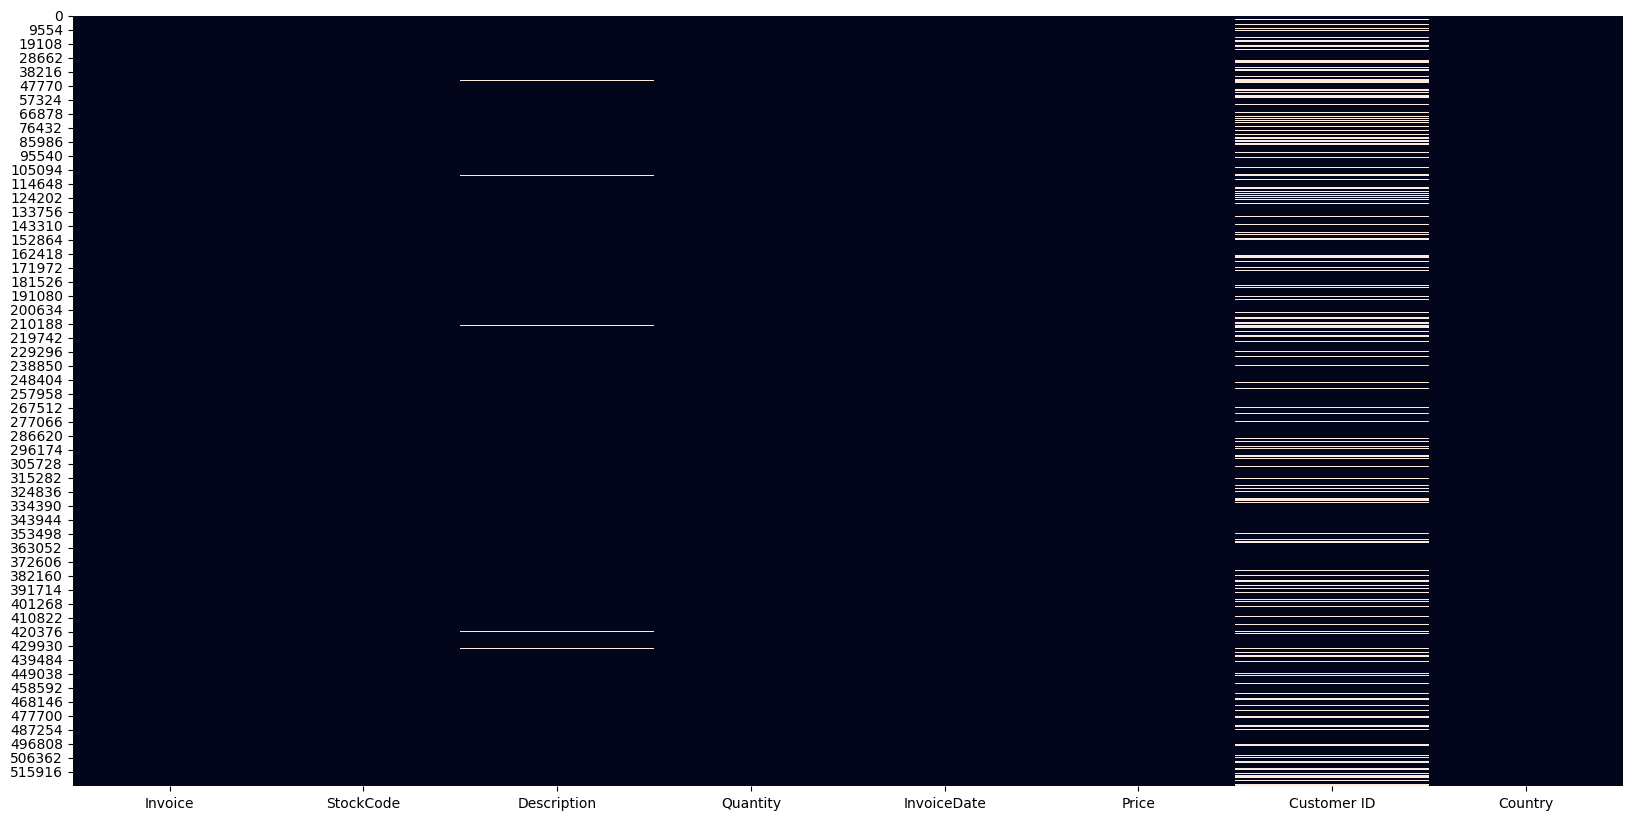

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(),cbar=False);

In [ ]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=False)

,0
Customer ID,0.205395
Description,0.005572
Invoice,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Country,0.000000


## Analyse de fond

In [ ]:
data[data['Quantity'] <0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


On doit verifier et bien etudier la colonne 'StockCode' car les valeurs inattendues de cette colonne pourraient etre  l'origine de la QUantity <0

In [ ]:
data[data["Price"]<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Meme chose que la Quantity, on doit bien expecter la colonne 'StockCode'

In [15]:
#Les InvoiceNo qui ne contiennent pas 6-Digits
data['Invoice']=data['Invoice'].astype('str')
data[data['Invoice'].str.match("^\\d{6}$")==False].shape

(10209, 8)

In [ ]:
filtered_data = data.loc[(data['Invoice'].str.match("^\\d{6}$")==False) & (data['Quantity']<0)]
filtered_data.shape

(10205, 8)

Il parait que toutes les echantillons qui ont un InvoiceNo ne respectant pas le macth ont des quantités negatives (car il ya 10209 individus contre 10205). Hypothese a verifier tjrs

"C489449": Il s'agit d'une annulation

In [ ]:
data['Invoice'].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

On remarque donc la colonne Invoice ne contient pas seulement "C" comme lettre. Il ya aussi "A". Cela veu dire quoi?

In [ ]:
data[data['Invoice'].str.contains("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Il ya seulement 03 individus qui ont cette particularite au niveau de "Invoice"
En regardant les colonnes comme Price et StockCode et Customer ID de ces individus, il est clair qu'il s'agit des valeurs inattendues

In [ ]:
data["StockCode"]=data["StockCode"].astype('str')
data[data["StockCode"].str.match("^\\d{5}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [ ]:
list_inattendue=data[(data["StockCode"].str.match("^\\d{5}$")==False) & (data["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False) ]['StockCode'].unique().tolist()

In [ ]:
data[data['StockCode'].isin(list_inattendue)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [ ]:
list_inattendue

['POST',
 'D',
 'DCGS0058',
 'DCGS0068',
 'DOT',
 'M',
 'DCGS0004',
 'DCGS0076',
 'C2',
 'BANK CHARGES',
 'DCGS0003',
 'TEST001',
 'gift_0001_80',
 'DCGS0072',
 'gift_0001_20',
 'DCGS0044',
 'TEST002',
 'gift_0001_10',
 'gift_0001_50',
 'DCGS0066N',
 'gift_0001_30',
 'PADS',
 'ADJUST',
 'gift_0001_40',
 'gift_0001_60',
 'gift_0001_70',
 'gift_0001_90',
 'DCGSSGIRL',
 'DCGS0006',
 'DCGS0016',
 'DCGS0027',
 'DCGS0036',
 'DCGS0039',
 'DCGS0060',
 'DCGS0056',
 'DCGS0059',
 'GIFT',
 'DCGSLBOY',
 'm',
 'DCGS0053',
 'DCGS0062',
 'DCGS0037',
 'DCGSSBOY',
 'DCGSLGIRL',
 'S',
 'DCGS0069',
 'DCGS0070',
 'DCGS0075',
 'B',
 'DCGS0041',
 'ADJUST2',
 '47503J ',
 'C3',
 'SP1002',
 'AMAZONFEE']

In [ ]:
result = data.loc[data['StockCode'] == 'POST', 'Description']

In [ ]:

# Liste pour stocker les résultats
result_list = []

# Parcourir la liste inattendue et récupérer une seule description par StockCode
for code in list_inattendue:
    result = data.loc[data['StockCode'] == code, 'Description'].dropna().unique()

    if result.size > 0:
        result_list.append([code, result[0]])  # Prendre la première description trouvée
    else:
        result_list.append([code, "Aucune description trouvée"])

# Création du tableau final sous forme de DataFrame
result_df = pd.DataFrame(result_list, columns=["StockCode", "Description"])

# Affichage du tableau
print(result_df)


       StockCode                          Description
0           POST                              POSTAGE
1              D                             Discount
2       DCGS0058                     MISO PRETTY  GUM
3       DCGS0068                    DOGS NIGHT COLLAR
4            DOT                       DOTCOM POSTAGE
5              M                               Manual
6       DCGS0004           HAYNES CAMPER SHOULDER BAG
7       DCGS0076         SUNJAR LED NIGHT NIGHT LIGHT
8             C2                             CARRIAGE
9   BANK CHARGES                         Bank Charges
10      DCGS0003                  BOXED GLASS ASHTRAY
11       TEST001              This is a test product.
12  gift_0001_80   Dotcomgiftshop Gift Voucher £80.00
13      DCGS0072               CAT CAMOUFLAGUE COLLAR
14  gift_0001_20   Dotcomgiftshop Gift Voucher £20.00
15      DCGS0044              HANDZ-OFF CAR FRESHENER
16       TEST002              This is a test product.
17  gift_0001_10   Dotcomgif

La liste des code de Stock inattendue. Il faut l'etudier et voir quoi retenir et quoi rejetter dans notre dataset.

Nous allons juste retenir PADS

In [6]:
cleaned_data= df.copy()